In [2]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parcial III - Métodos Computacionales

### Nombre: Orly de Jesus Rivera Cruz

---

## ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


---

# 1

(**35 puntos**) El **método de Jacobi** es un algoritmo iterativo para resolver sistemas lineales de la forma:

$$
A \mathbf{x} = \mathbf{b},
$$

donde \$A\$ es una matriz cuadrada no singular. A diferencia del método de Gauss-Seidel, Jacobi utiliza exclusivamente los valores de la iteración anterior para actualizar todas las variables simultáneamente, lo que lo hace más sencillo de paralelizar pero, en general, con una convergencia más lenta.

## Algoritmo

Dado un sistema lineal \$A \mathbf{x} = \mathbf{b}\$, el método de Jacobi consiste en:

1. Elegir un vector inicial \$\mathbf{x}^{(0)}\$ (por ejemplo, el vector nulo).

2. Para cada iteración \$k\$ y cada componente \$i = 1, 2, ..., n\$, actualizar:

$$
x_i^{(k)} = \frac{1}{a_{ii}} \left( b_i - \sum_{\substack{j=1 \\ j \neq i}}^{n} a_{ij} x_j^{(k-1)} \right)
$$

3. Repetir hasta que se cumpla un criterio de convergencia, como:

$$
\| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)} \| < \text{tolerancia}
$$

---

**a)** Escriba una función llamada `jacobi` que resuelva el sistema lineal \$A \mathbf{x} = \mathbf{b}\$ usando el método iterativo de Jacobi. La función debe aceptar como argumentos:

* La matriz \$A\$ y el vector \$\mathbf{b}\$,
* Una tolerancia (por defecto \$1\times 10^{-10}\$),
* Un número máximo de iteraciones.

Debe retornar la solución aproximada \$\mathbf{x}\$ y el número de iteraciones realizadas.

---

**b)** Aplique su función para resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
10x_1 - x_2 + 2x_3 = 6 \\[2mm]
-2x_1 + 11x_2 - x_4 = 25 \\[2mm]
3x_1 - x_2 + 10x_3 - x_4 = -11 \\[2mm]
2x_2 - x_3 + 8x_4 = 15
\end{cases}
$$

Use como vector inicial \$\mathbf{x}^{(0)} = \[0, 0, 0, 0]^T\$. Imprima la solución aproximada y el número de iteraciones necesarias para adquirir la convergencia.

---

**c)** Compare su solución con `np.linalg.solve`. ¿Qué tan cercana es la solución iterativa a la exacta? Para esto, realice un gráfico del error usando la norma euclidiana (`np.linalg.norm`) en función de la tolerancia y otro del número de iteraciones, empleando un `np.logspace(-18, -1, 18)`.

---



La solucion de la matriz de el segundo punto es: [ 1.06736509  2.56693873 -1.05335607  1.10159581]
Se demoro un numero de 16 Iteraciones


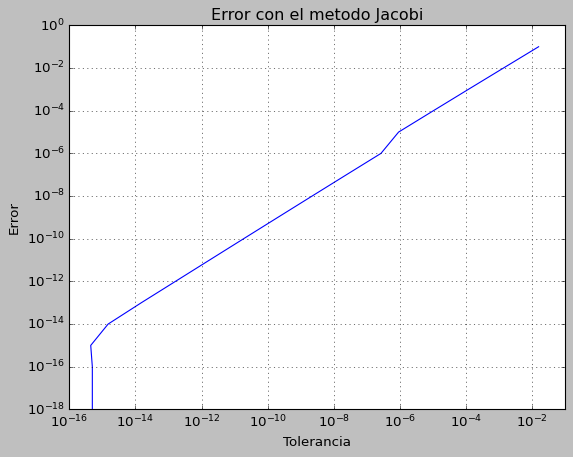

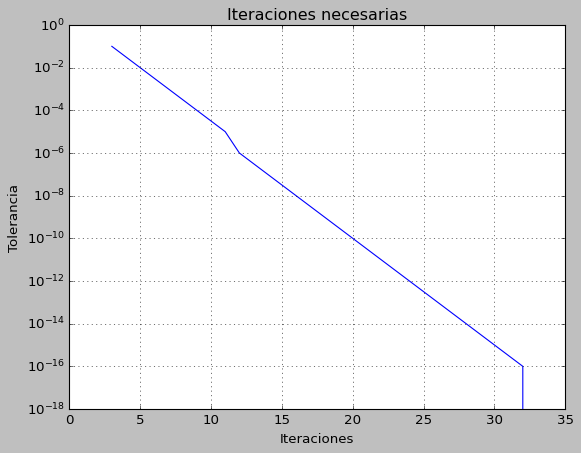

In [ ]:
#Problema 1

def jacobi (A,b,tol = 1e-8,itermax=1000):
    """

    Esta funcion realiza el metodo de Jacobi por medio de iteraciones.

    Entradas:
    A: Matriz de entrada cuadrada
    b: El vector resultante
    tol: La tolerancia a la que evaluamos el problema
    itermax: El maximo de iteraciones que hace la funcion

    Salidas:

    x_n: El vector solucion de el sistema
    k: EL numero de iteraciones que hizo la funcion
    """

    n = len(b)                  #Primero se guarda el tamaño de el vector resultante (Fila de la matriz o columna, es cuadrada)

    x_o = np.zeros(n)           #Este es el vector inicial (Viejo)

    x_n = np.zeros_like(x_o)    #Este es el vector nuevo, el que se va reemplazando iterativamente

    for k in range(itermax):    #Se limite a k iteraciones

        for i in range(n):      #Se recorren las filas
            suma = 0.0          #Se define la suma
            for j in range(n):          #Se recorren las columnas
                if j!=i:                #Se evalua si i es distinto de j
                    suma += A[i,j] * x_o[j]         #Se hace la suma SOLO si se cumple la condicion
            x_n[i] = (1/A[i,i])*(b[i] - suma)       #Se reemplaza la componente del nuevo vector or el metodo de jacobi
        
        error = np.linalg.norm(x_n - x_o, ord=np.inf)       #Una vez recorrido todas las filas se evalua la norma de la resta de los vectores

        if error < tol:                 #Si la tolerancia es menor paramos el metodo
            break
        else:                           #De otra manera hacemos que el vector viajo sea igual al nuevo
            x_o[:] = x_n
    
    return x_n , k                      #Retornamos el vector solucion y el numero de iteraciones

A = np.array([[10,-1,2,0] , [-2,11,0,-1] , [3,-1,10,-1], [0,2,-1,8]])       #Se define la matriz de el sistema de ecuaciones descrito

b = np.array([6,25,-11,15])                                                 #Con su debido vector resultante

Vectorja , Iter = jacobi(A,b)                                               #Realizamos nuestro metodo de jacobi

print("La solucion de la matriz de el segundo punto es:",Vectorja)  
print("Se demoro un numero de",Iter,"Iteraciones")

Vectorla = la.solve(A,b)            #Verifiquemos con el metodo que tiene numpy

error = np.zeros(18)                                            #Nos da el error que tiene el metodo dependiendo de su tolerancia
Iteraciones = np.zeros(18)
for i,tolv in enumerate(np.logspace(-18, -1, 18)):                  #Recorre distintas tolerancias
    Vectorja , Iter = jacobi (A,b,tol = tolv,itermax=1000)              #Hacemos jacobi
    error[i] = la.norm(Vectorla - Vectorja)                             #Insertamos el error
    Iteraciones[i] = Iter


plt.style.use("classic")

plt.title("Error con el metodo Jacobi")
plt.xlabel("Tolerancia")
plt.ylabel("Error")

plt.loglog(error,np.logspace(-18, -1, 18))                          #Una vez tenido los datos solo graficamos lo necesario

plt.grid()
plt.show()

plt.title("Iteraciones necesarias")
plt.xlabel("Iteraciones")
plt.ylabel("Tolerancia")

plt.semilogy(Iteraciones,np.logspace(-18, -1, 18))                          #Una vez tenido los datos solo graficamos lo necesario

plt.grid()
plt.show()

# 2

(**50 puntos**) El sistema **masa-resorte con fricción** es un modelo clásico en física que describe el movimiento de una masa sujeta a una fuerza restauradora (resorte) y una fuerza disipativa (fricción o viscosidad). Su dinámica está gobernada por la ecuación diferencial de segundo orden:

$$
m y''(t) + c y'(t) + k y(t) = 0,
$$

donde:

* $m$ es la masa del objeto,
* $c$ es el coeficiente de fricción (amortiguamiento),
* $k$ es la constante del resorte,
* $y(t)$ es la posición de la masa respecto a su equilibrio.

---

**a)** Reformule esta ecuación como un sistema de primer orden adecuado para ser resuelto con `solve_ivp`. Explique mediante una función explicita y realice su documentación.

---

**b)** Considere el siguiente caso:

* Masa: $m = 1$ kg
* Constante del resorte: $k = 4$ N/m
* Coeficiente de fricción: $c = 0.5$ N·s/m
* Condiciones iniciales: $y(0) = 1$, $y'(0) = 0$
* Intervalo de tiempo: $t \in [0, 20]$

Utilice `solve_ivp` para resolver el sistema y grafique $y(t)$ como $y'(t)$. Interprete el comportamiento del sistema.

---

**c)** Simule dos escenarios adicionales:

1. Sin fricción: $c = 0$
2. Con fuerte fricción: $c = 4.5$

Grafique los tres casos \$y(t)\$ en una misma figura y compare los regímenes: **no amortiguado**, **subamortiguado**, y **sobreamortiguado**.

---

**d)** Para cada uno de los tres casos, calcule la **energía mecánica total** del sistema en función del tiempo. La energía total se define como la suma de energía cinética y potencial:

$$
E(t) = \frac{1}{2} m v^2 + \frac{1}{2} k y^2
$$

Grafique $E(t)$ para los tres escenarios simulados. Analice y compare el comportamiento de la energía en cada caso. ¿Qué sucede con la energía a lo largo del tiempo? ¿Cómo se relaciona esto con el valor del coeficiente de fricción $c$?


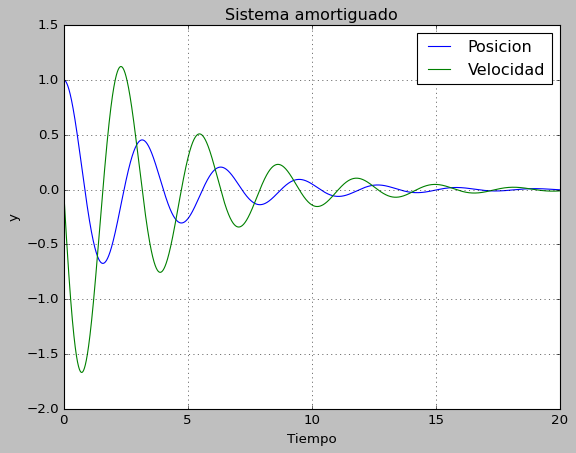

El sistema parece el de un masa-resorte que cada vez mas pierde su energia hasta parar


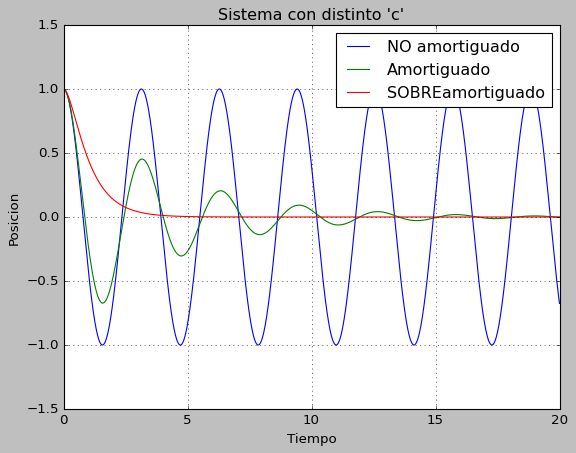

Podemos ver que la energia se intenta mantener cte caracteristico de no tener friccion 
Tambien nos damos cuenta que si nos acercamos a esta funcion energia cada vez hay mas error numerico por lo que es una aproximacion nada mas


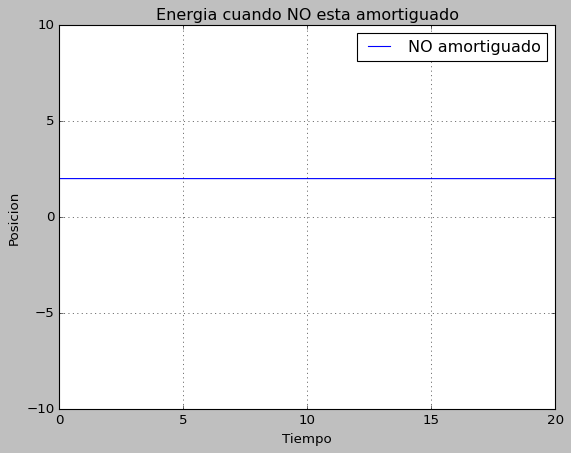

Podemos ver que la energia va bajando de a poco 


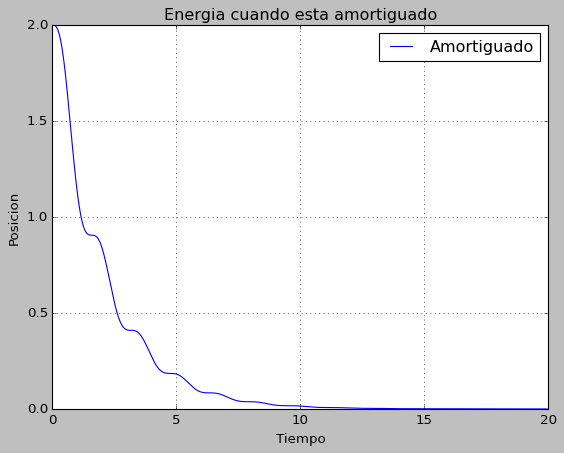

Podemos ver que la energia baja extremadamente rapido por su friccion alta 


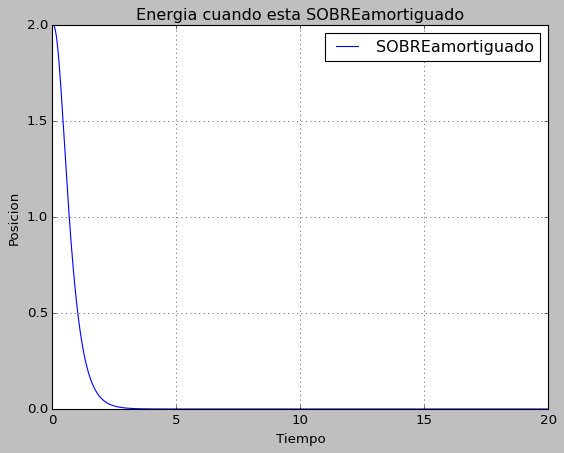

Entre menos coeficiente de friccion haya menos perdida de energia hay en el sistema


In [ ]:
#Problema 2

#Punto 1

m = 1 #kg                         #Escribimos los datos iniciales 
k = 4 #N/m
c = 0.5 #Ns/m

def EDO(t, Y):                    #Hacemos el cambio de variable correspondiente
  """
  Realizamos un cambio de variable en el sistema

  Cambio de variables: y1 = y, y2 = y'
  
  dy1/dx = y2
  dy2/dx = (- ky1 - cy2)*(1/m) 

  
  """
  y1, y2 = Y
  dy1 = y2
  dy2 = (-k*y1 - c*y2)*(1/m)

  return np.array([dy1, dy2])

#Punto 2

h = 1e-3               #El paso en el que se efectua el metodo
y0 = [1,0]             #Las condiciones iniciales 

t_span = (0,20)                                     #El intervalo donde se quiere hallar la funcion
t = np.arange( 0 , 20 + h , h )

sol = solve_ivp(EDO, t_span , y0 ,method="RK45", t_eval=t)        #En este caso el sistema esta amortiguado

plt.title("Sistema amortiguado")                                  #Graficamos el sistema con la posicion y la velocidad

plt.xlabel("Tiempo")
plt.ylabel("y")

plt.plot(sol.t, sol.y[0], label="Posicion")                           
plt.plot(sol.t, sol.y[1], label="Velocidad")

plt.legend()
plt.grid()
plt.show()

print("El sistema parece el de un masa-resorte que cada vez mas pierde su energia hasta parar")

#Punto 3
#Graficaremos la posicion de los tres en una misma grafica

c = 0 #Ns/m

sol = solve_ivp(EDO, t_span , y0 ,method="RK45", t_eval=t)      #En este caso el sistema esta NO amortiguado

plt.title("Sistema con distinto 'c'")

plt.xlabel("Tiempo")
plt.ylabel("Posicion")

plt.plot(sol.t, sol.y[0] , label="NO amortiguado")                           


c = 0.5 #Ns/m

sol = solve_ivp(EDO, t_span , y0 ,method="RK45", t_eval=t)      #En este caso el sistema esta amortiguado


plt.xlabel("Tiempo")
plt.ylabel("Posicion")

plt.plot(sol.t, sol.y[0], label="Amortiguado")                           


c = 4.5 #Ns/m

sol = solve_ivp(EDO, t_span , y0 ,method="RK45", t_eval=t)    #En este caso el sistema esta sobreamortiguado

plt.xlabel("Tiempo")
plt.ylabel("Posicion")

plt.plot(sol.t, sol.y[0], label="SOBREamortiguado")                           

plt.grid()
plt.legend()
plt.show()

#Punto 4 ---------------------------------------------------------------------------------------------------------------

#Graficaremos como anteriormente lo hicimos pero esta vez definiremos la energia desde antes

print("Podemos ver que la energia se intenta mantener cte caracteristico de no tener friccion ")
print("Tambien nos damos cuenta que si nos acercamos a esta funcion energia cada vez hay mas error numerico por lo que es una aproximacion nada mas")

c = 0 #Ns/m

sol = solve_ivp(EDO, t_span , y0 ,method="RK45", t_eval=t)      #En este caso el sistema esta NO amortiguado

plt.title("Energia cuando NO esta amortiguado")

plt.xlabel("Tiempo")
plt.ylabel("Posicion")

plt.ylim(-10,10)

E = (1/2)*(m)*((sol.y[1])**2) + (1/2)*(k)*((sol.y[0])**2)

plt.plot(sol.t, E , label="NO amortiguado")                           

plt.grid()
plt.legend()
plt.show()

print("Podemos ver que la energia va bajando de a poco ")

c = 0.5 #Ns/m

sol = solve_ivp(EDO, t_span , y0 ,method="RK45", t_eval=t)      #En este caso el sistema esta amortiguado

plt.title("Energia cuando esta amortiguado")

plt.xlabel("Tiempo")
plt.ylabel("Posicion")

E = (1/2)*(m)*(sol.y[1])**2 + (1/2)*(k)*(sol.y[0])**2

plt.plot(sol.t, E, label="Amortiguado")                           

plt.grid()
plt.legend()
plt.show()

print("Podemos ver que la energia baja extremadamente rapido por su friccion alta ")

c = 4.5 #Ns/m

sol = solve_ivp(EDO, t_span , y0 ,method="RK45", t_eval=t)    #En este caso el sistema esta sobreamortiguado

plt.title("Energia cuando esta SOBREamortiguado")

plt.xlabel("Tiempo")
plt.ylabel("Posicion")

E = (1/2)*(m)*(sol.y[1])**2 + (1/2)*(k)*(sol.y[0])**2

plt.plot(sol.t, E , label="SOBREamortiguado")                           

plt.grid()
plt.legend()
plt.show()


print("Entre menos coeficiente de friccion haya menos perdida de energia hay en el sistema")


# 3

**(15 puntos)** Sea $A$ una matriz cuadrada de tamaño $n \times n$. Dos propiedades fundamentales de los autovalores de $A$ son:

1. **Determinante**:

   $$
   \det(A) = \prod_{i=1}^{n} \lambda_i
   $$

2. **Traza**:

   $$
   \mathrm{tr}(A) = \sum_{i=1}^{n} \lambda_i
   $$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando un conjunto de matrices aleatorias $A$ de $5\times 5$ (1000 matrices diferentes), verifique numéricamente ambas propiedades. Puede emplear las funciones `np.linalg.det`, `np.trace` y `np.linalg.eigvals`.


In [ ]:
#Problema 3

n = np.random.randint(2,5)                                  #Se genera el tamaño de la matriz cuadrada
A = np.random.randint(-100,99,size=(n,n))                   #Se genera al azar una matriz cuadrada con numeors enteros

print("La matriz escogida al azar es:\n",A)

Autovalores = la.eigvals(A)                                 #Sacamos los autovalores de neustra matriz al azar A

det = 1                                                     
for Valor in Autovalores:                                   #Multiplicamos iterativamente estos autovalores para obtener el determinante segun la relacion
    det *= Valor

Determinante_la = la.det(A)                                 #Comprobaremos con numpy

print("\nPodemos comprobar que la multiplicacion de los autovalores es el determinante,\n" \
"aunque por autovalores tiene un error numerico, ademas, como nuestra\n" \
"matriz es real entonces no nos preocupamos y solo vemos la parte real\n")

print("El determinatne por medio de los autovalores es",det.real)
print("El determinatne por medio de numpy es:",Determinante_la)

print("\nSu error es de ",abs(Determinante_la - det.real))

trz = 0
for Valor in Autovalores:                                   #Sumaremos iterativamente estos autovalores para obtener la traza segun la relacion
    trz += Valor

Traza_la = la.trace(A)                                      #Comprobaremos con numpy

print("\nEl mismo error numerico pasa cuando hacemos la traza e igualmente solo,\n" \
"agarramos nuestra parte real")

print("La traza por medio de los autovalores es",trz.real)
print("La traza por medio de numpy es:",Traza_la)

print("\nSu error es de ",abs(Traza_la - trz.real))

print("Gracias profe por la oportunidad :)")

La matriz escogida al azar es:
 [[-68 -77 -48]
 [ 68  13 -58]
 [-15 -36 -96]]

Podemos comprobar que la multiplicacion de los autovalores es el determinante,
aunque por autovalores tiene un error numerico, ademas, como nuestra
matriz es real entonces no nos preocupamos y solo vemos la parte real

El determinatne por medio de los autovalores es -234653.99999999994
El determinatne por medio de numpy es: -234654.0

Su error es de  5.820766091346741e-11

El mismo error numerico pasa cuando hacemos la traza e igualmente solo,
agarramos nuestra parte real
La traza por medio de los autovalores es -150.99999999999994
La traza por medio de numpy es: -151

Su error es de  5.684341886080802e-14
